# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port blair
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | seven pagodas
Processing Record 5 of Set 1 | gerash
Processing Record 6 of Set 1 | bethel
City not found. Skipping...
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | bandarbeyla
Processing Record 9 of Set 1 | mitsamiouli
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | hasaki
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | geraldton
Processing Record 16 of Set 1 | villamontes
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | port lincoln
Processing Record 20 of Set 1 | potosi
Processing Record 21 of Set 1 | margaret 

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port blair,11.6667,92.7500,31.02,74,75,7.72,IN,1690613884
1,east london,-33.0153,27.9116,17.52,82,20,7.72,ZA,1690613884
2,edinburgh of the seven seas,-37.0676,-12.3116,14.58,84,100,12.95,SH,1690613885
3,seven pagodas,12.6264,80.1722,34.03,45,100,7.57,IN,1690613885
4,gerash,27.6652,54.1371,36.08,28,6,1.81,IR,1690613886


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port blair,11.6667,92.7500,31.02,74,75,7.72,IN,1690613884
1,east london,-33.0153,27.9116,17.52,82,20,7.72,ZA,1690613884
2,edinburgh of the seven seas,-37.0676,-12.3116,14.58,84,100,12.95,SH,1690613885
3,seven pagodas,12.6264,80.1722,34.03,45,100,7.57,IN,1690613885
4,gerash,27.6652,54.1371,36.08,28,6,1.81,IR,1690613886


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

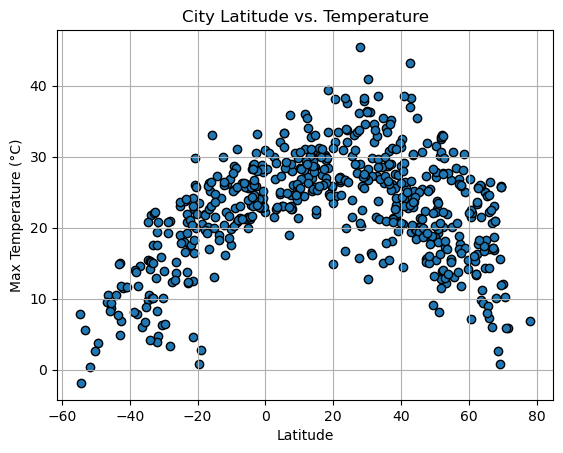

In [27]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("City Latitude vs. Temperature")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

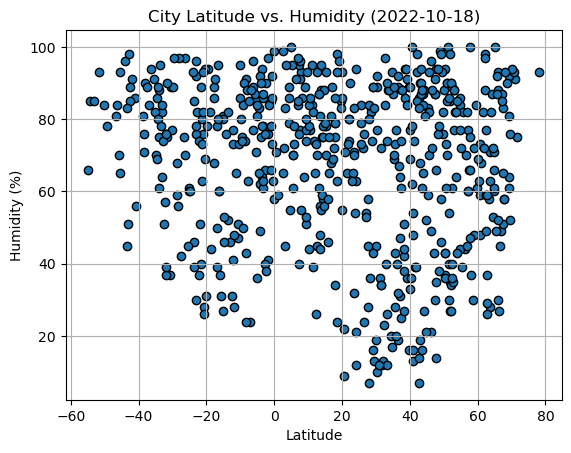

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

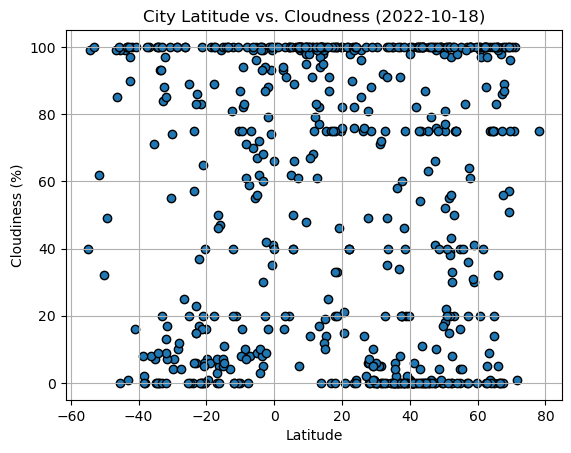

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudness (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

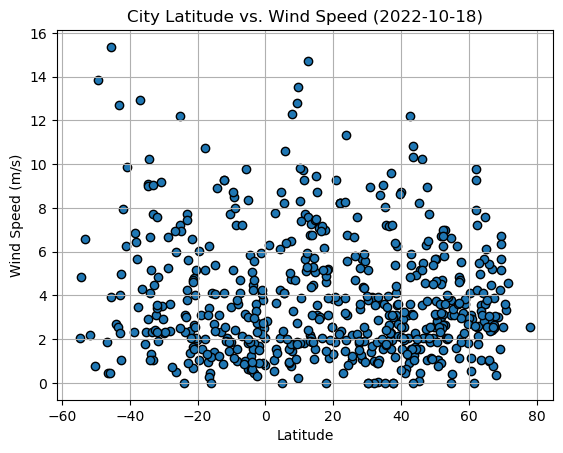

In [31]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [136]:
# Define a function to create Linear Regression plots
def linear_regression(x_data, y_data, eqn_coordinates, x_label, y_label=None):
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    r, _ = pearsonr(x_data, y_data)
    print(f"The r-value is: {r, _}")

    regression_line = [slope * x + intercept for x in x_data]

    plt.scatter(x_data, y_data, marker="o", edgecolors="black", label="Data")
    plt.plot(x_data, regression_line, color="red", label="Regression Line")
    plt.xlabel(x_label)
    
    if y_label:
        plt.ylabel(y_label)
    
    plt.annotate(line_eq,eqn_coordinates,fontsize=12,color="red")

    plt.show()


In [137]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port blair,11.6667,92.7500,31.02,74,75,7.72,IN,1690613884
3,seven pagodas,12.6264,80.1722,34.03,45,100,7.57,IN,1690613885
4,gerash,27.6652,54.1371,36.08,28,6,1.81,IR,1690613886
6,bandarbeyla,9.4942,50.8122,29.80,51,100,13.51,SO,1690613887
9,tiksi,71.6872,128.8694,5.85,75,1,4.57,RU,1690613888


In [138]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,east london,-33.0153,27.9116,17.52,82,20,7.72,ZA,1690613884
2,edinburgh of the seven seas,-37.0676,-12.3116,14.58,84,100,12.95,SH,1690613885
5,adamstown,-25.0660,-130.1015,18.97,61,89,12.20,PN,1690613887
7,mitsamiouli,-11.3847,43.2844,26.16,65,20,2.06,KM,1690613887
8,puerto natales,-51.7236,-72.4875,0.43,93,62,2.20,CL,1690613888


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: (-0.5242341807701475, 7.888278914143103e-30)


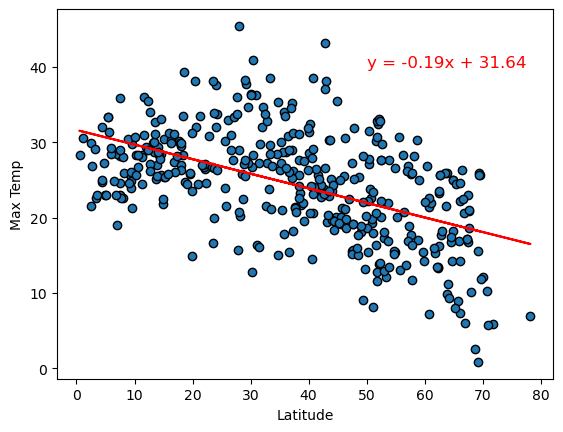

In [142]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], (50, 40), "Latitude", "Max Temp")

The r-value is: (0.7797976306285442, 4.275099019222575e-40)


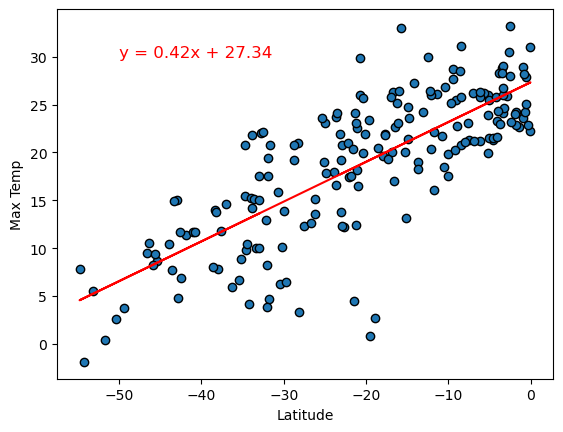

In [143]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], (-50, 30), "Latitude", "Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: (-0.0583055389381726, 0.24287391596743918)


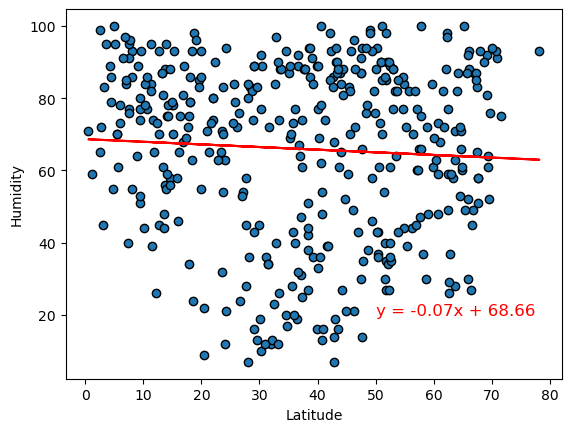

In [145]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], (50, 20), "Latitude", "Humidity")

The r-value is: (-0.1290796184507016, 0.07590920837834103)


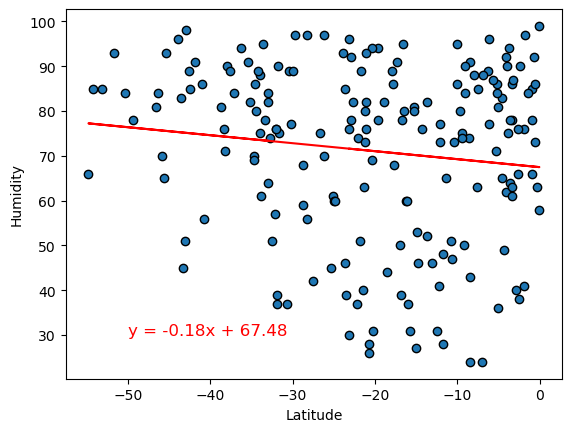

In [146]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], (-50, 30), "Latitude", "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: (-0.12556985866552875, 0.011637134916642415)


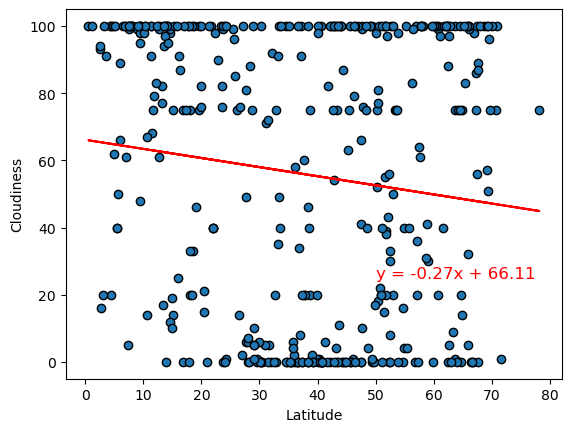

In [148]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], (50, 25), "Latitude", "Cloudiness")

The r-value is: (0.012545846536401974, 0.8635962218166868)


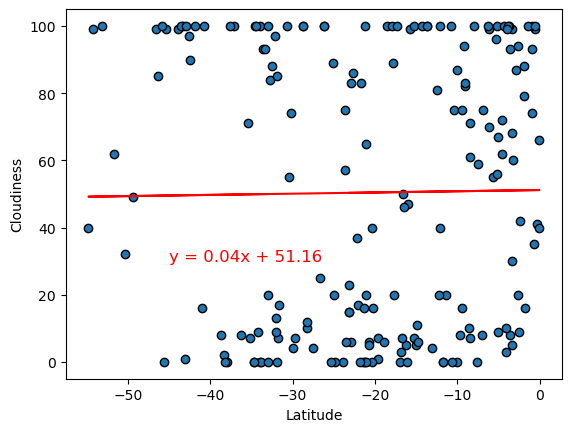

In [150]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], (-45, 30), "Latitude", "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: (-0.14107450876044061, 0.004547436811089574)


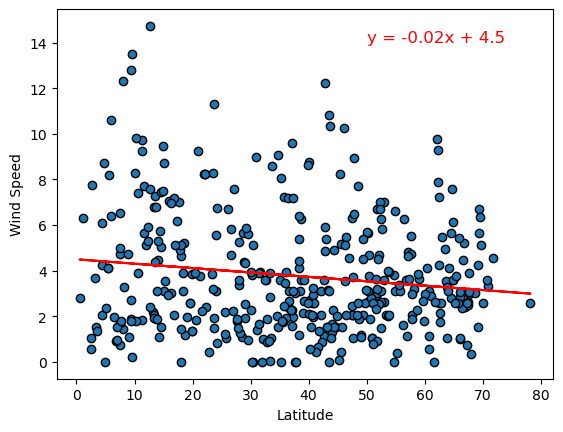

In [152]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], (50, 14), "Latitude", "Wind Speed")

The r-value is: (-0.23437887791780915, 0.0011346081094556547)


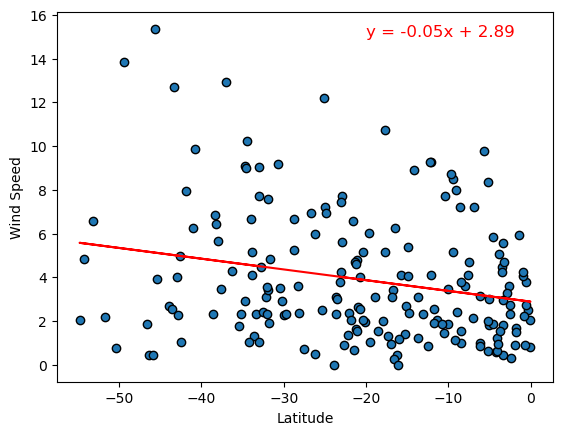

In [154]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], (-20, 15), "Latitude", "Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE